# 線性判別分析(Linear Discriminant Analysis)

##### 先引入我們需要的packages

In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import random
from matplotlib.patches import Ellipse
import math

# Training Data

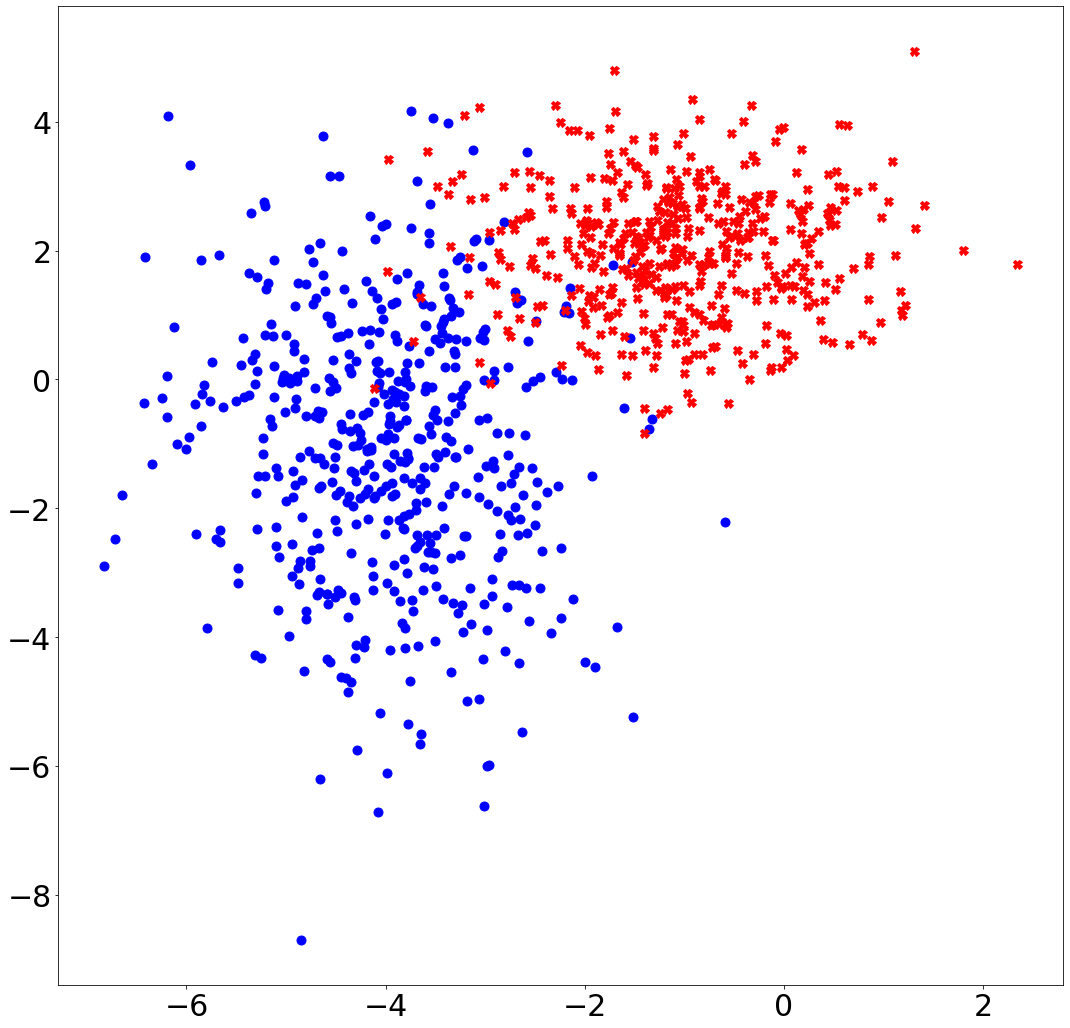

In [2]:
N=1000
CLASS=2
x=np.zeros((N,2))
y=random.randint(0,CLASS,N)
x_loc=[-4,-1]
x_scale=[1,1]
y_loc=[-1,2]
y_scale=[2,1]
color=["bo","rX"]
plt.rcParams["figure.figsize"] = (18,18)
for i in range(0,CLASS):
    BOOL=(y==i)
    x[BOOL,0]=random.normal(loc=x_loc[i], scale=x_scale[i], size=(sum(BOOL)))
    x[BOOL,1]=random.normal(loc=y_loc[i], scale=y_scale[i], size=(sum(BOOL)))
    plt.plot(x[BOOL,0],x[BOOL,1],color[i],markersize=9)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

# Parameter Setting

In [3]:
m_1=np.sum(x[y==0],axis=0)/sum(y==0)
m_2=np.sum(x[y==1],axis=0)/sum(y==1)
S_B=np.outer((m_1-m_2),(m_1-m_2))
S_1=np.dot((x[y==0]-m_1).T,(x[y==0]-m_1))
S_2=np.dot((x[y==1]-m_2).T,(x[y==1]-m_2))
eigenvalue,eigenvector=np.linalg.eig(np.dot(np.linalg.inv(S_1+S_2),S_B))
w=eigenvector[:,0]

# Project to 1D guess w=[1,0]

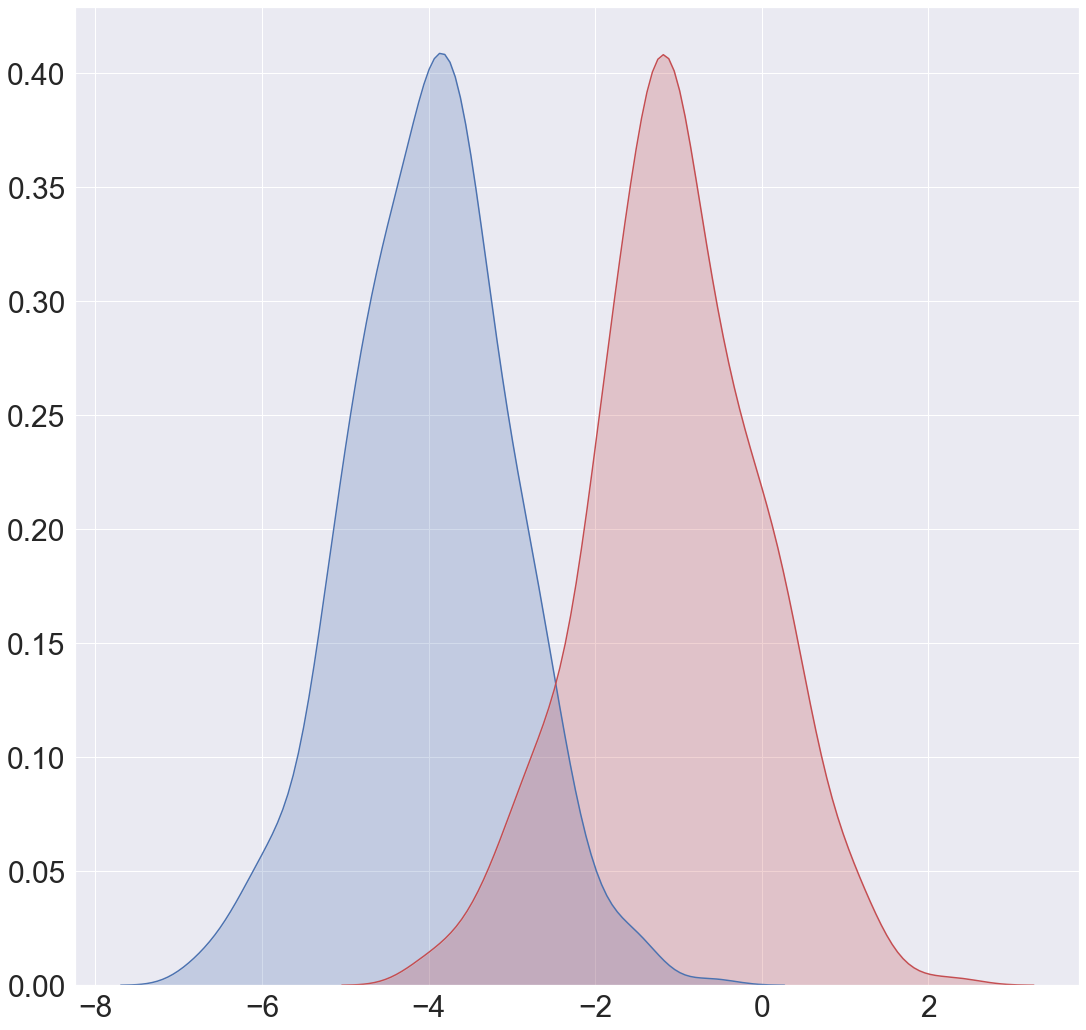

In [4]:
trans_none=np.dot(x,[1,0])
plt.rcParams["figure.figsize"] = (18,18)
sns.set(style="darkgrid")
cc=["b","r"]
for i in range(0,2):
    BOOL=(y==i)
    fig = sns.kdeplot(trans_none[BOOL], shade=True, color=cc[i])
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

# Project to 1D with training w

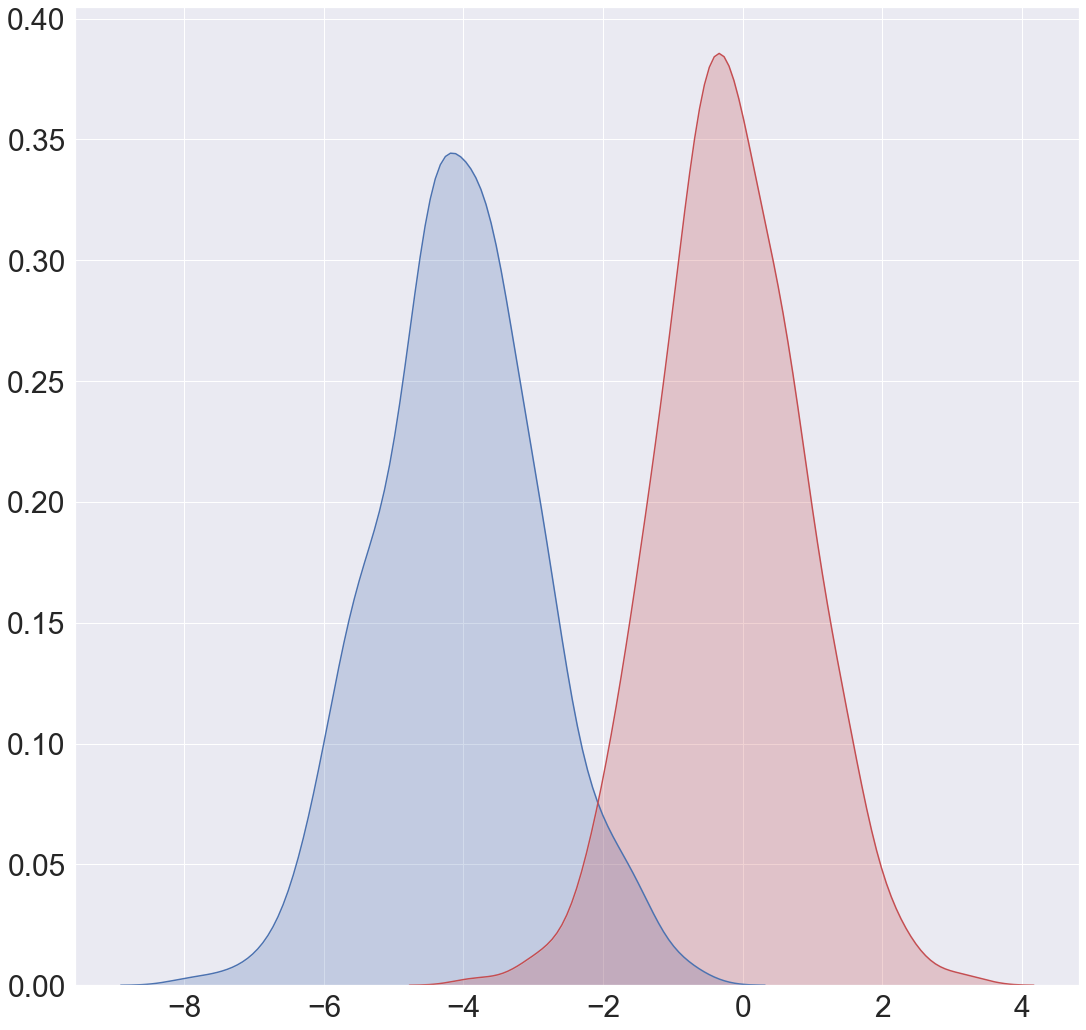

In [5]:
trans=np.dot(x,w)
plt.rcParams["figure.figsize"] = (18,18)
sns.set(style="darkgrid")
cc=["b","r"]
for i in range(0,2):
    BOOL=(y==i)
    fig = sns.kdeplot(trans[BOOL], shade=True, color=cc[i])
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

# Plot Distribution

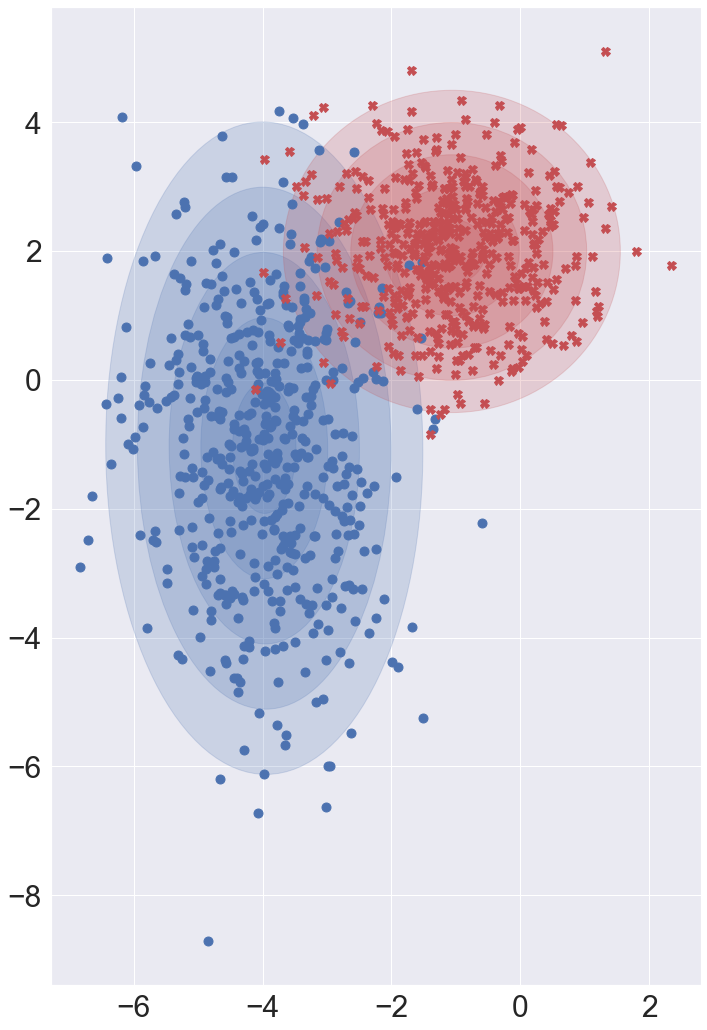

In [7]:
plt.rcParams["figure.figsize"] = (18,18)
fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
for i in range(0,CLASS):
    BOOL=(y==i)
    plt.plot(x[BOOL,0],x[BOOL,1],color[i],markersize=9)
    for j in range(1,6):
        ellipse = Ellipse((np.mean(x[BOOL,0]),np.mean(x[BOOL,1])),
                          np.std(j*x[BOOL,0]),np.std(j*x[BOOL,1]),angle=math.atan(w[1]/w[0]),
                          color=cc[i],alpha=0.2)
        ax.add_artist(ellipse)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()